### Reddit Survey EDA


In [80]:
#import data
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<li> Last Name Baysinger 
<li> Dependant Variable == Employment Status

In [81]:
df = pd.read_csv("Reddit.csv")

In [82]:
df

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18',
       u'Unnamed: 19'],
      dtype='object')

In [84]:
#Dropping Unnamed 15-19 because it is mostly garbage and State in accordance with instructions.
X = pd.DataFrame()
X['ID'] = df['Entry Id']
X['Sex'] = df['Please indicate your gender.']
X['Age'] = df['Please select the category that includes your age.']
X['Relationship'] = df['What is your marital status?']
X['Military'] = df['Are you or have you ever been in military service?']
X['Children'] = df['Do you currently have children under the age of 18 living in your household?']
X['Education'] = df['What best describes your level of education?']
X['Country'] = df['Treated country data']
X['Income'] = df['Which one of the following ranges includes your total yearly household income before taxes?']
X['Subreddit'] = df['treated subreddit data']
X['Pet'] = df['Are you a dog or a cat person?']
X['Cheese'] = df['If you were a cheese, what cheese would you be?']
X['Employment'] = df['What best describes your employment status?']

In [85]:
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [86]:
describe_categorical(X)

,Sex,Age,Relationship,Military,Children,Education,Country,Income,Subreddit,Pet,Cheese,Employment
count,32754,32754,32754,32754,32754,32754,32754,32754,28419,32752,32754,32754
unique,3,8,7,3,3,8,440,9,1833,7,17,7
top,Male,18-24,Single,No,No,Bachelor's degree,United States,"Under $20,000",askreddit,I like dogs.,Other,Employed full time
freq,26418,15802,10428,30526,27488,11046,20967,7892,2123,17149,6562,14814


In [87]:
X.describe()

,ID
count,32754.000000
mean,16378.561916
std,9456.272427
min,1.000000
25%,8189.250000
50%,16379.500000
75%,24567.750000
max,32756.000000


<li> Dropping ID because it is just place in list

In [88]:
X.drop(["ID"], axis=1, inplace=True)

In [89]:
from collections import Counter
input =  X.Country
c = Counter( input )

print( c.items() )

[('Canada', 2888), ('United states of America. ', 1), ('Republic of Ireland ', 1), ('Cameroon', 1), ('Camada', 1), ('United Kingdom, India', 1), ('Unites States', 2), ('U.K lol', 1), ('british virgin islands', 1), ('Russian Federation', 10), ('Dominica', 1), ('United  Kingdom', 1), ('eire', 1), ('Holland', 4), ('SIngapore', 2), ('Winland', 1), ('Australi', 1), ('Canda', 1), (' Canada eh', 1), ('philippines', 1), ('The United Kingdom of Great Britain and Northern Ireland', 3), ('FRANCE', 3), ('South Korea', 36), ('Turkey', 24), ('Canada, Eh', 1), ('SV', 1), ('Slovakia', 12), ('Canada (currently Korea)', 1), ('Norway', 288), ('the Netherlands', 15), ('Montenegro', 2), ('United States of America (DC)', 1), ('Global Vagabond', 1), ('Unted Kingdom', 1), ('united Sr', 1), ('The Netherlands', 141), ('Cayman Islands', 3), ('Finland', 188), ('china', 1), ('Mx', 1), ('Mauritius', 2), ('Portugal', 87), ('Fiji', 2), ('http://www.reddit.com/r/funny/comments/iocz1/making_bad_chemistry_jokes/', 1), (

<li> dropping because there are only 189-196 countries depending on sources
<li> http://www.worldatlas.com/nations.htm
<li> professor said cleaning was optional on Slack Channel (to aggregate use pycountry)

In [90]:
X.drop(["Country"], axis=1, inplace=True)

In [91]:
from collections import Counter
input =  X.Subreddit
c = Counter( input )

print( c.items() )

[(nan, 4335), ('daddit', 3), ('lolgod', 1), ('prefix', 1), ('controversial', 5), ('relationships', 14), ('paris', 1), ('sanantonio', 1), ('teaching', 1), ('columbiamo', 1), ('rug_leeds', 1), ('all the reddits!', 1), ('abletonlive', 1), ('geology', 2), ('oceans', 1), ('synthesizers', 1), ('no clue', 1), ('memes', 2), ('jrpg', 4), ('mw3', 1), ('mw2', 1), ('gonewildstories', 1), ('baking', 3), ('scholar', 2), ('fffffuuuuuuuuuuuu/comics', 1), ('polyamory', 3), ('phyton', 1), ('i dont know', 1), ('bacon', 1), ('ents', 1), ('cactus', 1), ('todayilearned, wikipedia, technology, gaming etc', 1), ('cooking', 42), ('captchaart', 2), ('adviceanimals', 80), ('gamedev', 50), ('slackline', 2), ('new', 112), ('art.reddit.com', 1), ('jailbaitarchives', 2), ('anthropology', 5), ('lgbt', 71), ('china', 5), ('minecraft or blowjobs', 1), ('self.ask', 1), ("'home' page (or front page if you prefer)", 1), ('anarchism', 20), ('leaves', 1), ('economics', 25), ('personalfinance', 7), ('double bass', 1), ('DROP

<li> Looks like mainly junk and probably not part of the survey questions

In [92]:
X.drop(["Subreddit"], axis=1, inplace=True)

### Initial Scrub Complete

In [93]:
describe_categorical(X)

,Sex,Age,Relationship,Military,Children,Education,Income,Pet,Cheese,Employment
count,32754,32754,32754,32754,32754,32754,32754,32752,32754,32754
unique,3,8,7,3,3,8,9,7,17,7
top,Male,18-24,Single,No,No,Bachelor's degree,"Under $20,000",I like dogs.,Other,Employed full time
freq,26418,15802,10428,30526,27488,11046,7892,17149,6562,14814


In [94]:
X.describe()

,Sex,Age,Relationship,Military,Children,Education,Income,Pet,Cheese,Employment
count,32754,32754,32754,32754,32754,32754,32754,32752,32754,32754
unique,3,8,7,3,3,8,9,7,17,7
top,Male,18-24,Single,No,No,Bachelor's degree,"Under $20,000",I like dogs.,Other,Employed full time
freq,26418,15802,10428,30526,27488,11046,7892,17149,6562,14814


<li> Looks like we only have categorical variables
<li> Also we have count of 3 for Sex, Military, Children, and 7 for Dog/Cat (Pet) all should be 2

In [95]:
from collections import Counter
input = X.Sex
c = Counter( input )

print( c.items() )

[('None', 201), ('Male', 26418), ('Female', 6135)]


<li> Tradionally I would try to scrub this but my thoughts are starting to change on this due to LGBT movement trying to move away from genders and maybe this is actually happening in data sets. 
<li> An earlier report published in April 2011 by the Williams Institute estimated that 3.8 percent of Americans identified as gay/lesbian, bisexual, or transgender: 1.7 percent as lesbian or gay, 1.8 percent as bisexual, and 0.3 percent as transgender.
<li> https://en.wikipedia.org/wiki/LGBT_demographics_of_the_United_States

In [96]:
 (201/32754.0)

0.0061366550650302255

<li> below .3 threshold so maybe we can keep it for now and scrub it later if need be

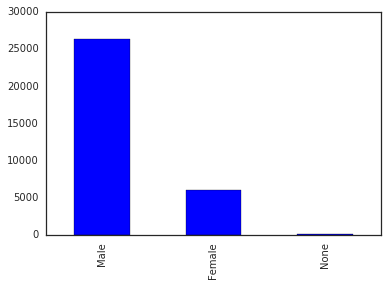

In [97]:
X.Sex.value_counts().plot(kind='bar')

In [98]:
from collections import Counter
input = X.Age
c = Counter( input )

print( c.items() )

[('None', 88), ('55-64', 140), ('25-34', 11575), ('18-24', 15802), ('45-54', 502), ('Under 18', 2330), ('65 or Above', 60), ('35-44', 2257)]


In [99]:
88/32754.0

0.0026866947548391034

<li>Replace missing values with NaN so they can be dropped easier

In [100]:
X.Age = X.Age.replace( "None", np.nan)

In [101]:
from collections import Counter
input = X.Age
c = Counter( input )

print( c.items() )

[(nan, 88), ('55-64', 140), ('25-34', 11575), ('18-24', 15802), ('45-54', 502), ('Under 18', 2330), ('65 or Above', 60), ('35-44', 2257)]


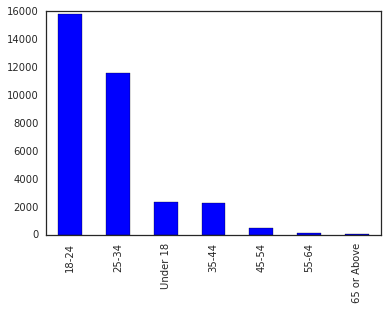

In [102]:
X.Age.value_counts().plot(kind='bar')

<li> None values are now NaN
<li> Main Audience 18-34 by a wide margin
<li> Would be interesting to have an actual discrete age value

In [103]:
input =  X.Relationship
c = Counter( input )

print( c.items() )

[('Widowed', 44), ('In a relationship', 9828), ('Forever Alone', 5850), ('Engaged', 1109), ('Married/civil union/domestic partnership', 5490), ('Single', 10428), ('Blank', 5)]


In [104]:
X.Relationship = X.Relationship.replace( "Blank", np.nan)

In [105]:
input =  X.Relationship
c = Counter( input )

print( c.items() )

[(nan, 5), ('Widowed', 44), ('In a relationship', 9828), ('Forever Alone', 5850), ('Engaged', 1109), ('Married/civil union/domestic partnership', 5490), ('Single', 10428)]


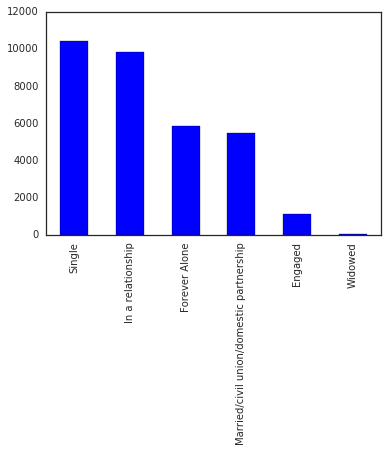

In [106]:
X.Relationship.value_counts().plot(kind='bar')

<li> Majority Single and In a relationship which makes sense with the primary users being 18-34

In [107]:
input = X.Military
c = Counter( input )

print( c.items() )

[('none', 5), ('Yes', 2223), ('No', 30526)]


In [108]:
X.Military = X.Military.replace( "none", np.nan)

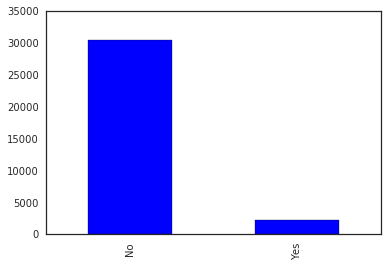

In [109]:
X.Military.value_counts().plot(kind='bar')

In [110]:
2224/32754.0

0.06790010380411553

<li> .068% is well below average for the US population but hard to find that average for the world however still it is pretty low
<li> http://fivethirtyeight.com/datalab/what-percentage-of-americans-have-served-in-the-military/

In [111]:
input = X.Children
c = Counter( input )

print( c.items() )

[('Yes', 5047), ('None', 219), ('No', 27488)]


In [112]:
X.Children = X.Children.replace( "None", np.nan)

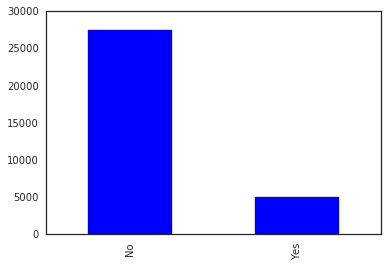

In [113]:
X.Children.value_counts().plot(kind='bar')

In [114]:
5047/32754.0

0.1540880503144654

<li> Not even 1% of survey takers have Children. 

In [115]:
input = X.Education
c = Counter( input )

print( c.items() )

[('Some high school', 1924), ('None', 144), ('Some college', 9600), ("Bachelor's degree", 11046), ('Associate degree', 1411), ('Trade or Vocational degree', 635), ('High school graduate or equivalent', 3272), ('Graduate or professional degree', 4722)]


In [116]:
X.Education= X.Education.replace( "None", np.nan)

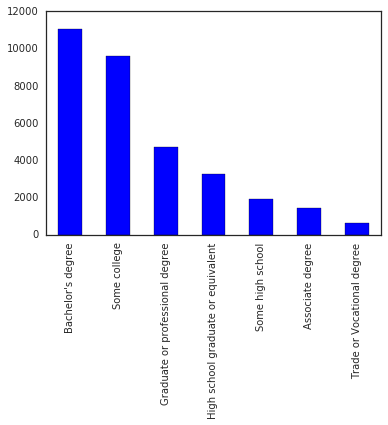

In [117]:
X.Education.value_counts().plot(kind='bar')

<li> Largest groups are college and some college followed by Graduate or professional degree
<li> Quick Recap 18-34 males well educated, mainly single or in a relationship (not marriage), no children or record of military service  

In [118]:
input = X.Income
c = Counter( input )

print( c.items() )

[('$150,000 or more', 2695), ('none', 1615), ('$100,000 - $149,999', 3522), ('$20,000 - $29,999', 3206), ('Under $20,000', 7892), ('$40,000 - $49,999', 2686), ('$70,000 - $99,999', 4101), ('$30,000 - $39,999', 2904), ('$50,000 - $69,999', 4133)]


In [119]:
X.Income = X.Income.replace( "none", np.nan)

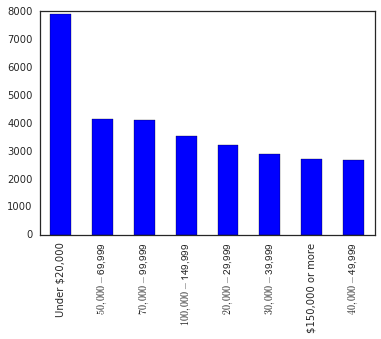

In [120]:
X.Income.value_counts().plot(kind='bar')

<li>Largest group under 20,000

In [121]:
input = X.Pet
c = Counter( input )

print( c.items() )

[(nan, 2), ('none', 5), ('I like turtles.', 4442), (' Reddit.com', 1), ('movies', 1), ('askreddit', 2), ('I like dogs.', 17149), ('I like cats.', 11152)]


In [122]:
X.Pet = X.Pet.replace( ["none", " Reddit.com","movies","askreddit"], [np.nan, np.nan, np.nan, np.nan])

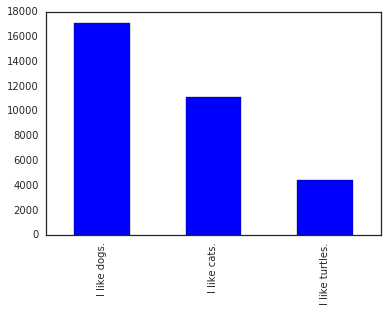

In [123]:
X.Pet.value_counts().plot(kind='bar')

<li> Unexpected response to question "Are you a dog or a cat person?"
<li> I like tuttles with a count of 4,442 which is more than 10%

In [124]:
input = X.Cheese
c = Counter( input )

print( c.items() )

[('1', 1), ('none', 5), (' awww', 1), ('Provolone', 3454), ('Munster', 1770), ('Cheddar', 6101), ('Paneer', 618), (' Pics', 1), ('Limburger', 337), ('American', 1438), ('Other', 6562), ('Feta', 2991), (' f7u12', 2), ('Swiss', 3214), ("programming')", 1), ('Goat', 2516), ('Brie', 3742)]


In [125]:
X.Cheese = X.Cheese.replace( ["none", "1", " awww"," Pics"," f7u12","programming')"], [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])

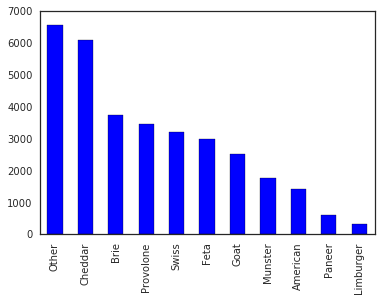

In [126]:
X.Cheese.value_counts().plot(kind='bar')

<li> Cheddar is the favorite named cheese by a wide margin but Other has a higher overall count

In [127]:
input = X.Employment
c = Counter( input )

print( c.items() )

[('Not employed and not looking for work', 682), ('None', 151), ('Retired', 85), ('Not employed, but looking for work', 2087), ('Freelance', 1948), ('Employed full time', 14814), ('Student', 12987)]


In [128]:
X.Employment = X.Employment.replace( "None", np.nan)

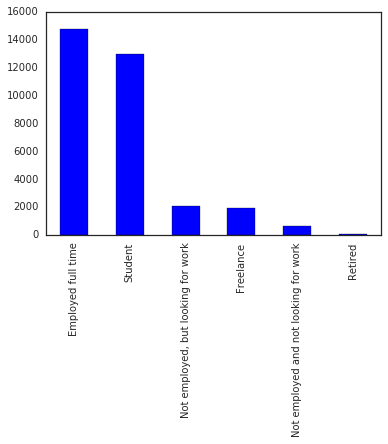

In [129]:
X.Employment.value_counts().plot(kind='bar')

<li> Most indiduals are employed full time or are students

### Scrub Complete

In [131]:
describe_categorical(X)

,Sex,Age,Relationship,Military,Children,Education,Income,Pet,Cheese,Employment
count,32754,32666,32749,32749,32535,32610,31139,32743,32743,32603
unique,3,7,6,2,2,7,8,3,11,6
top,Male,18-24,Single,No,No,Bachelor's degree,"Under $20,000",I like dogs.,Other,Employed full time
freq,26418,15802,10428,30526,27488,11046,7892,17149,6562,14814


### Converting Categorical Variables to Dummies

In [132]:
categorical_variables = X.columns

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [133]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


In [135]:
# Compute the correlation matrix
corr = X.corr()
print corr

                                                    Sex_Female  Sex_Male  \
Sex_Female                                            1.000000 -0.980288   
Sex_Male                                             -0.980288  1.000000   
Sex_None                                             -0.037724 -0.160452   
Age_18-24                                             0.047638 -0.040098   
Age_25-34                                            -0.032750  0.031868   
Age_35-44                                            -0.027108  0.027036   
Age_45-54                                             0.009537 -0.008741   
Age_55-64                                             0.010528 -0.009381   
Age_65 or Above                                       0.017864 -0.020595   
Age_Missing                                          -0.008289 -0.067160   
Age_Under 18                                         -0.013523  0.015552   
Relationship_Engaged                                  0.030406 -0.029262   
Relationship

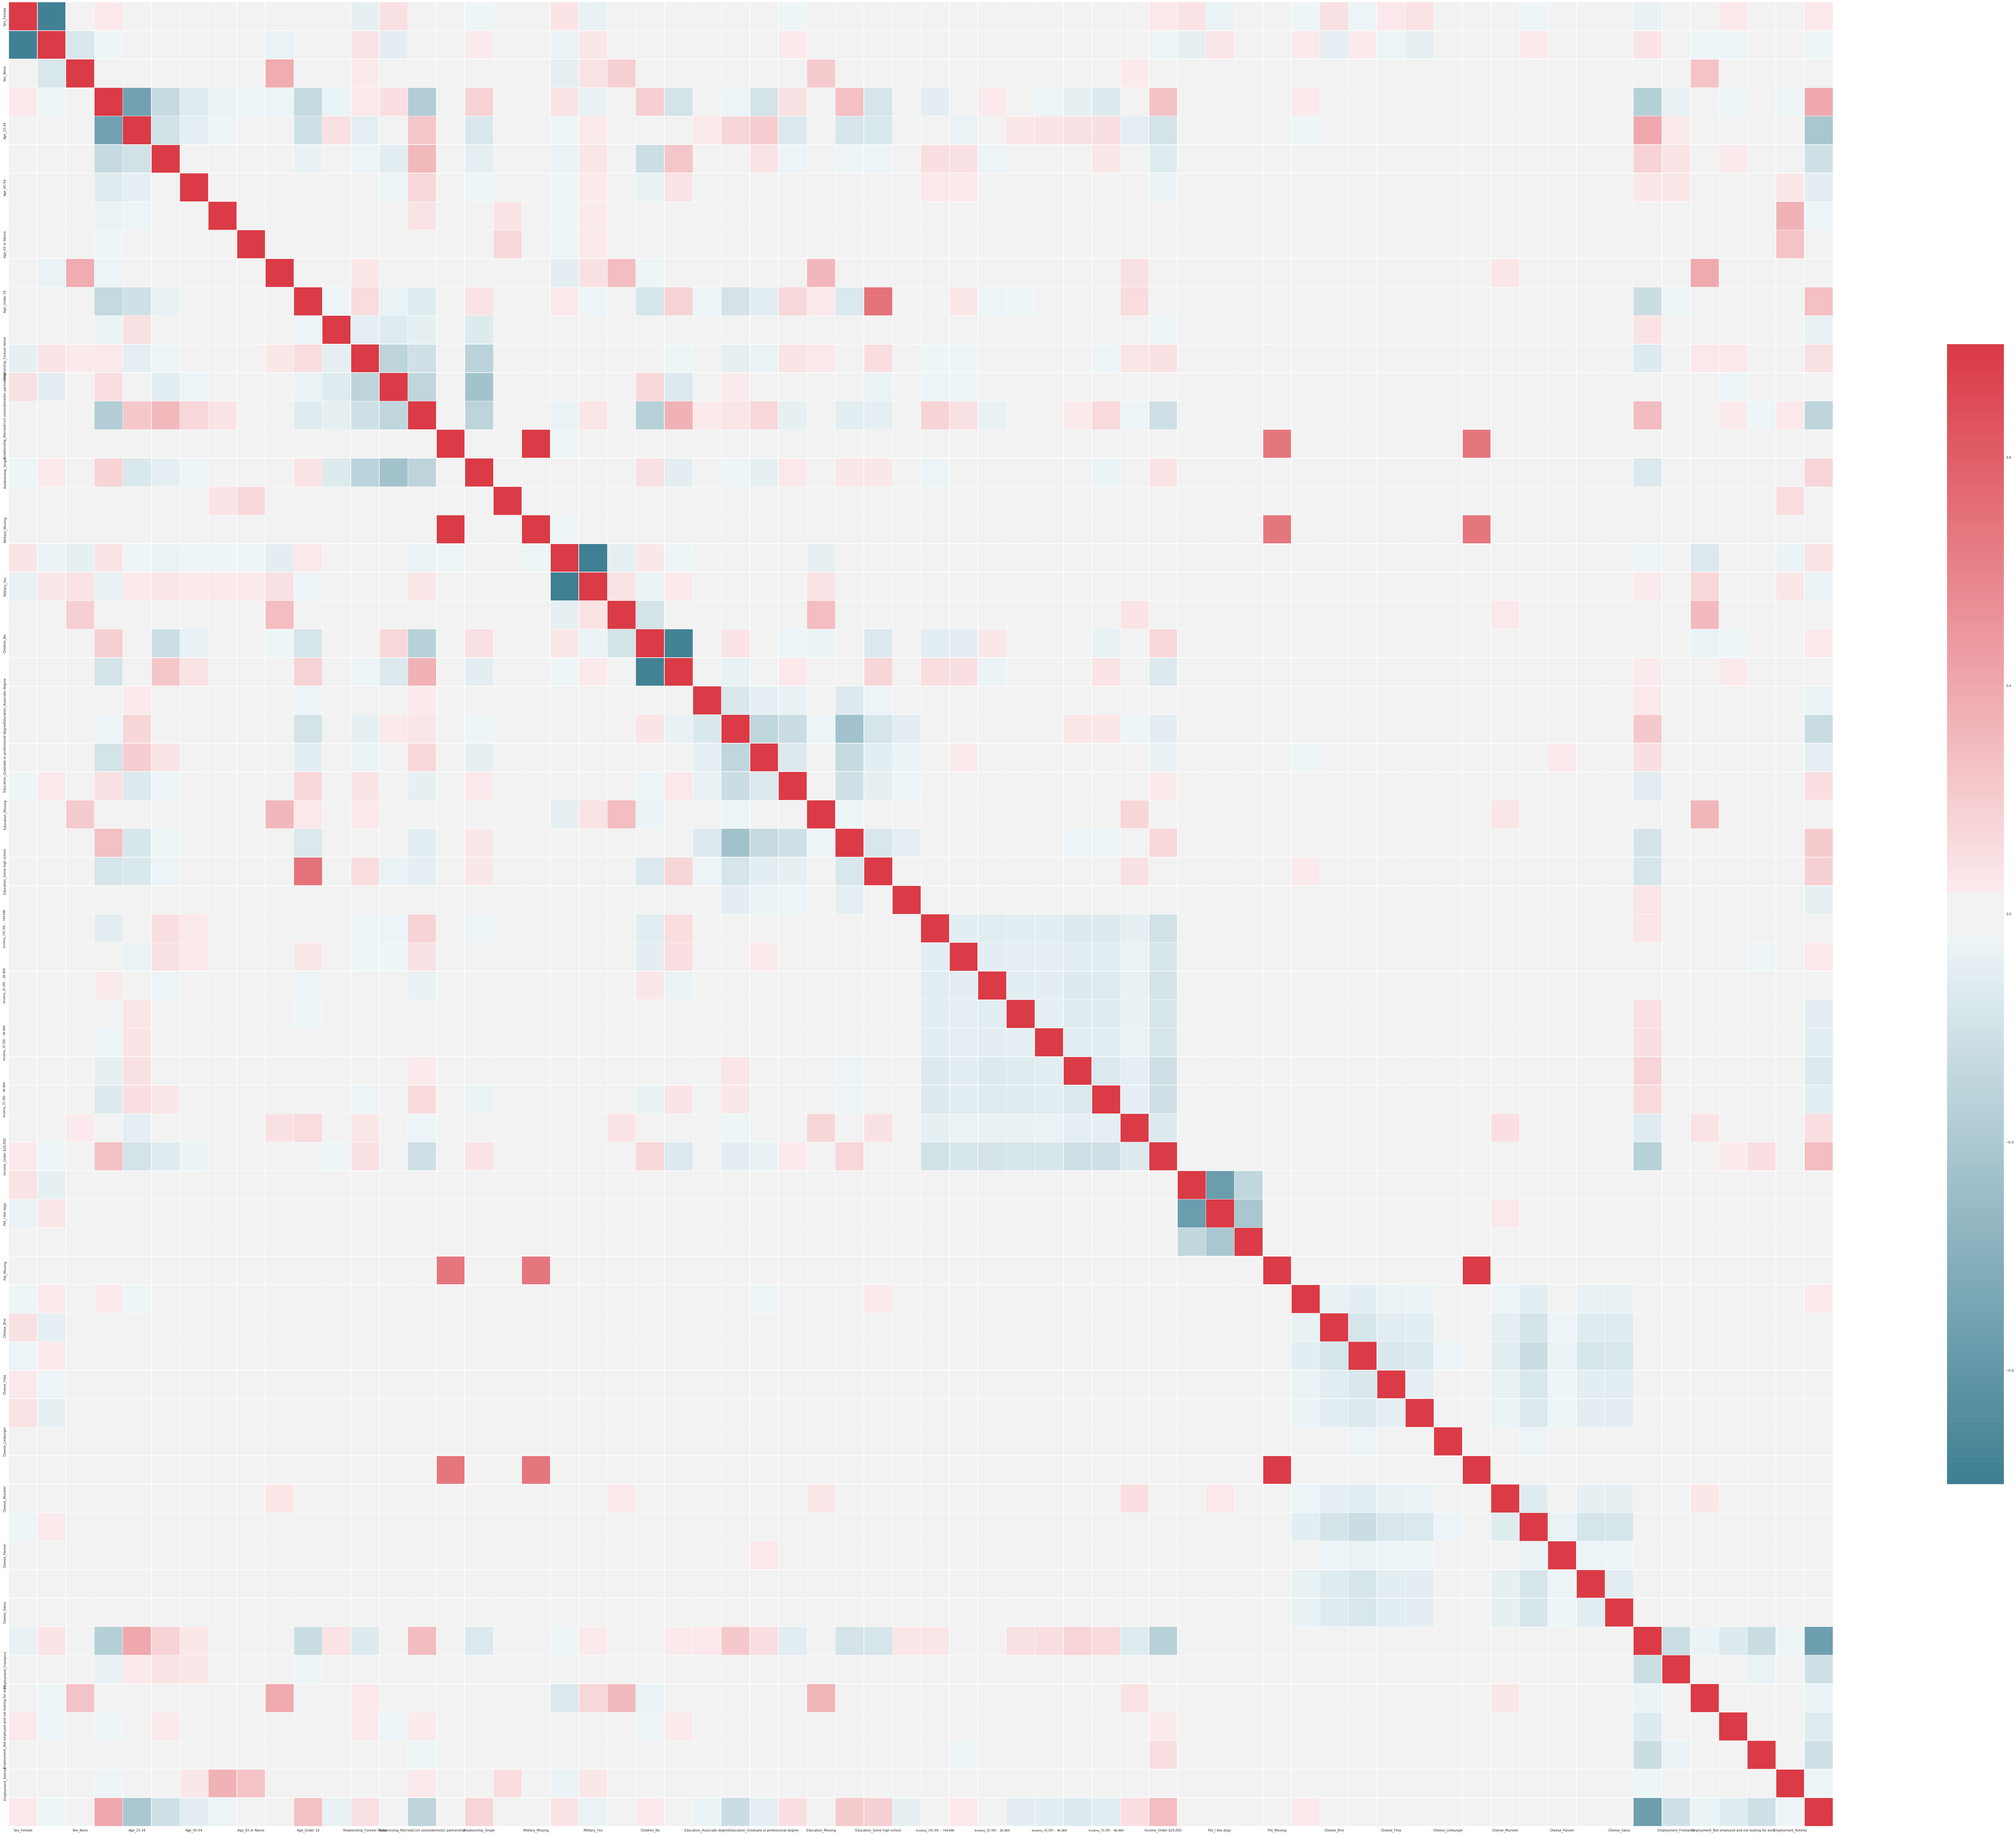

In [57]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(128, 128))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

<li> If one value is missing there is a higher likelyhood of more missing values
<li> Age 18-24 is has a correlation with being a student or having full time employment
<li> Age 35-44 has a correlation with being in a legal relationship
<li> Age 55-64 has a correlation with being retired
<li> Age 25-34 has a correlation with full time employment and a negative correlation with Income under $20,000
<li> Students have a negative correlation with being in a legal relationship

In [136]:
X.describe()

,Sex_Female,Sex_Male,Sex_None,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65 or Above,Age_Missing,...,Cheese_Paneer,Cheese_Provolone,Cheese_Swiss,Employment_Employed full time,Employment_Freelance,Employment_Missing,Employment_Not employed and not looking for work,"Employment_Not employed, but looking for work",Employment_Retired,Employment_Student
count,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,...,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000
mean,0.187305,0.806558,0.006137,0.482445,0.353392,0.068908,0.015326,0.004274,0.001832,0.002687,...,0.018868,0.105453,0.098125,0.452281,0.059474,0.004610,0.020822,0.063717,0.002595,0.396501
std,0.390162,0.395002,0.078097,0.499699,0.478030,0.253301,0.122849,0.065239,0.042761,0.051764,...,0.136061,0.307141,0.297489,0.497725,0.236513,0.067742,0.142790,0.244253,0.050877,0.489178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
y = pd.DataFrame()
y['Full Time'] = X['Employment_Employed full time']
y['Freelance'] = X['Employment_Freelance']
y['Missing'] = X['Employment_Missing']
y['Unemployed/not looking'] = X['Employment_Not employed and not looking for work']
y['Unemployed/looking'] = X['Employment_Not employed, but looking for work']
y['Retired'] = X['Employment_Retired']
y['Student'] = X['Employment_Student']

In [138]:
y

,Full Time,Freelance,Missing,Unemployed/not looking,Unemployed/looking,Retired,Student
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0
6,1,0,0,0,0,0,0
7,0,0,0,0,1,0,0
8,1,0,0,0,0,0,0
9,0,1,0,0,0,0,0


In [139]:
X.drop(['Employment_Employed full time','Employment_Freelance','Employment_Missing','Employment_Not employed and not looking for work','Employment_Not employed, but looking for work','Employment_Retired','Employment_Student'], axis=1, inplace=True)

In [140]:
X

,Sex_Female,Sex_Male,Sex_None,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65 or Above,Age_Missing,...,Cheese_Cheddar,Cheese_Feta,Cheese_Goat,Cheese_Limburger,Cheese_Missing,Cheese_Munster,Cheese_Other,Cheese_Paneer,Cheese_Provolone,Cheese_Swiss
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Data Prep Complete for Random Forrest

In [63]:

# With the goal above, I will import just what I need. 
# The model to use (I already imported it above, but will do it again here so each example is self-contained)
from sklearn.ensemble import RandomForestRegressor

# The error metric. In this case, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

In [64]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

In [65]:
y

,Full Time,Freelance,Missing,Unemployed/not looking,Unemployed/looking,Retired,Student
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0
6,1,0,0,0,0,0,0
7,0,0,0,0,1,0,0
8,1,0,0,0,0,0,0
9,0,1,0,0,0,0,0


In [66]:
model.fit(X, y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [67]:
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.717881941585


In [68]:
model.feature_importances_

array([  1.80981514e-02,   1.65491208e-02,   2.46111174e-03,
         6.59276972e-03,   1.70682547e-01,   7.89981298e-02,
         7.75202348e-03,   2.21182422e-03,   1.14397273e-03,
         8.01550894e-04,   1.07763749e-02,   1.07800470e-02,
         2.14686473e-02,   2.54383010e-02,   2.63709872e-02,
         5.86807251e-05,   2.60287502e-02,   8.05285965e-04,
         4.07863301e-05,   1.21511074e-02,   1.18410101e-02,
         4.05430297e-03,   1.51253174e-02,   1.49757219e-02,
         8.92465832e-03,   4.10858991e-02,   1.40048776e-02,
         1.01584933e-02,   1.85305685e-03,   1.95536021e-02,
         5.59976548e-03,   6.81212863e-03,   9.62362157e-03,
         9.47190589e-03,   1.82085943e-02,   1.29429809e-02,
         9.65359535e-03,   1.10787924e-02,   9.71521710e-03,
         9.93410001e-03,   6.01477934e-02,   3.05654809e-02,
         3.13404321e-02,   2.27839579e-02,   9.53467396e-05,
         1.06932464e-02,   1.87452219e-02,   2.28149224e-02,
         1.84839229e-02,

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  app.launch_new_instance()


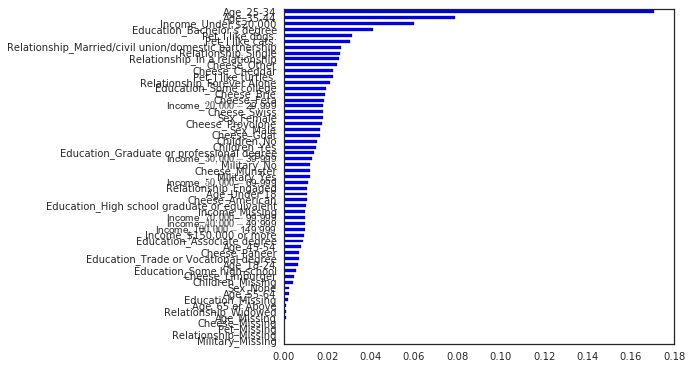

In [69]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6));

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:41: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


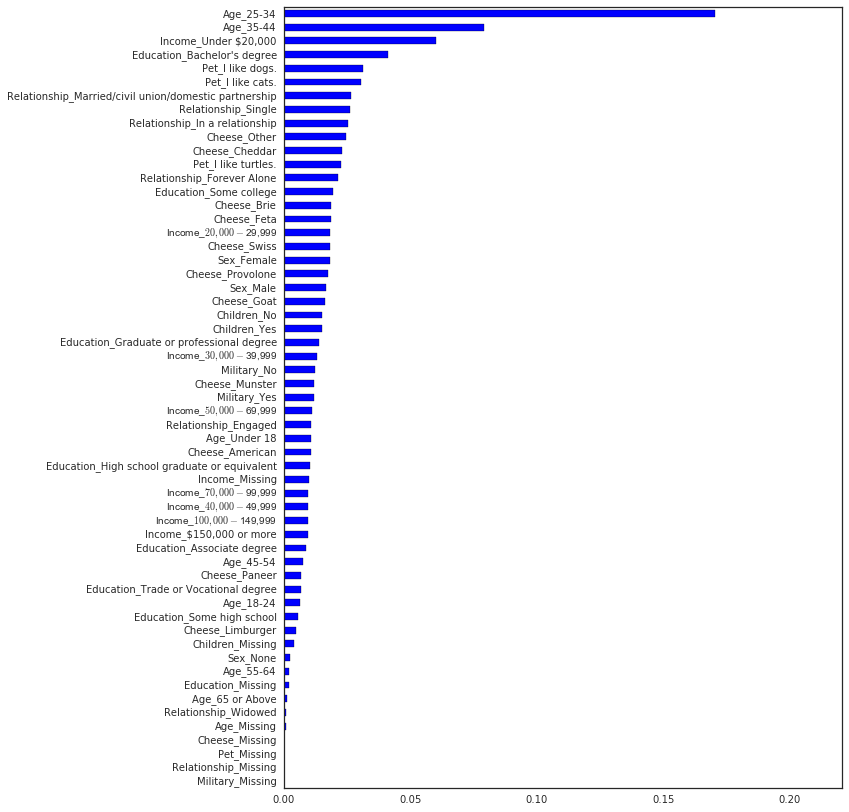

In [70]:
# Complex version that shows the summary view

def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, X.columns,)

30 trees
C-stat:  0.694813417897

50 trees
C-stat:  0.703594267317

100 trees
C-stat:  0.717881941585

200 trees
C-stat:  0.72382200394

500 trees
C-stat:  0.733618272975

1000 trees
C-stat:  0.737780199557

2000 trees
C-stat:  0.7399598193



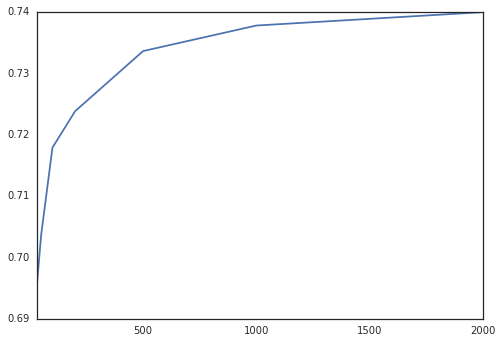

In [74]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.737780199557

None option
C-stat:  0.737780199557

sqrt option
C-stat:  0.751651419222

log2 option
C-stat:  0.750906058517

0.9 option
C-stat:  0.742871573914

0.2 option
C-stat:  0.752147747933



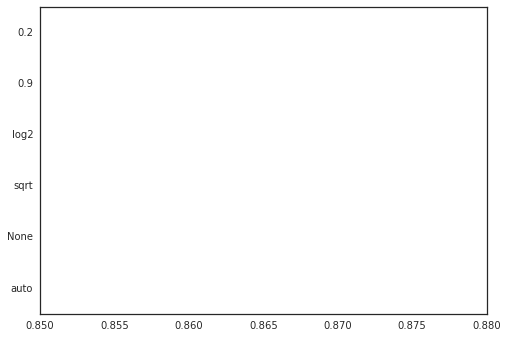

In [75]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.70,.80));

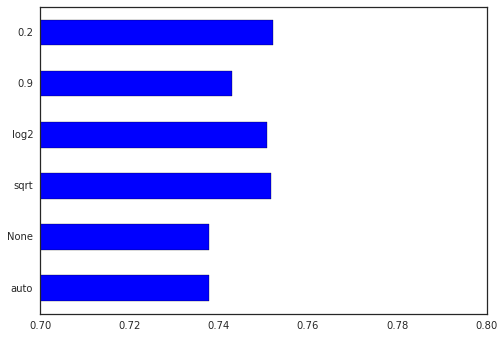

In [76]:
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.70,.80));

1 min samples
C-stat:  0.752147747933

2 min samples
C-stat:  0.777779910572

3 min samples
C-stat:  0.78562910714

4 min samples
C-stat:  0.787145002504

5 min samples
C-stat:  0.791047896463

6 min samples
C-stat:  0.792640621391

7 min samples
C-stat:  0.792295514139

8 min samples
C-stat:  0.794686644061

9 min samples
C-stat:  0.793305657749

10 min samples
C-stat:  0.793771833069



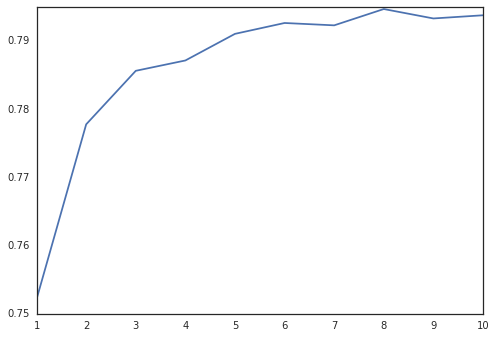

In [77]:

results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features=0.2, 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

In [78]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features=.2, 
                              min_samples_leaf=8)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.794686644061


### Final Results

Initial C-stat:  0.717881941585

Final C-stat:  0.794686644061

<li> We saw an improvement byt adding estimator and chaning max feature and leaves

<li> Estimators = 1000
<li> Max Features = .2
<li> Leaves = 8


Interesting points: 
<li> holding out data improved C-Stat
<li> Countries could be cleaned to improve C-Stat